In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO

import fnmatch

In [2]:
output_dir = list(os.listdir('../output'))

In [3]:
df_template = pd.read_csv(StringIO("""package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag"""))

In [34]:
df_all = df_template[:]
for file in output_dir:
    df_all = pd.concat([df_all,pd.read_csv('../output/' + file)])

In [25]:
datasets = list(os.listdir('../datasets'))

In [26]:
for ds in datasets:
    output_dataset = list(filter(lambda x: fnmatch.fnmatch(x, '*' + ds + '*'), output_dir))
    
df_all = df_template[:]

for file in output_dataset:
    df_all = pd.concat([df_all,pd.read_csv('../output/' + file)])

In [36]:
df_all['cost'] = df_all.index

### Groupby por dataset

In [143]:
df = df2[:]

In [144]:
# explode pelas colunas accuracy_history e f1_history
df = df.set_index(['package','time_elapsed','classifier','sample_size','strategy','dataset']).apply(pd.Series.explode).reset_index()

# explode retorna coluna como object, logo é necessário transformar em número
df['f1_history'] = pd.to_numeric(df['f1_history'])
df['accuracy_history'] = pd.to_numeric(df['accuracy_history'])

In [150]:
df \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
dataset     package strategy                 classifier                 
37_diabetes modAL   Query by Committee       NB              3.482731   
                                             C4.5            0.740780   
                                             RF             86.491538   
                    Uncertain Sampling       RF              6.527501   
                    Expected Error Reduction NB             40.886095   
                                             5NN           261.674131   
                    Query by Committee       5NN            57.973146   
                    Expected Model Change    NB              0.476810   
                    Uncertain Sampling       5NN             7.757410   
                    Random Sampling          NB              0.346933   
                    Expected Model Change    C4.5            0.122656   
                    Uncertain Sampling       C4.5            0.024242   
                    Random Sampling          C4.5            0.129895   
                    Uncertain Sampling       NB              0.253108   
                    Expected Model Change    5NN             7.850634   
                    Random Sampling          RF              7.666746   
                                             5NN             7.074939   
                    Expected Error Reduction C4.5           11.184964   

                                                         sample_size  \
dataset     package strategy                 classifier                
37_diabetes modAL   Query by Committee       NB             0.156250   
                                             C4.5           0.156250   
                                             RF             0.156250   
                    Uncertain Sampling       RF             0.061198   
                    Expected Error Reduction NB             0.074219   
                                             5NN            0.074219   
                    Query by Committee       5NN            0.156250   
                    Expected Model Change    NB             0.042969   
                    Uncertain Sampling       5NN            0.039062   
                    Random Sampling          NB             0.100260   
                    Expected Model Change    C4.5           0.040365   
                    Uncertain Sampling       C4.5           0.009115   
                    Random Sampling          C4.5           0.100260   
                    Uncertain Sampling       NB             0.009115   
                    Expected Model Change    5NN            0.016927   
                    Random Sampling          RF             0.100260   
                                             5NN            0.100260   
                    Expected Error Reduction C4.5           0.074219   

                                                         accuracy_history  \
dataset     package strategy                 classifier                     
37_diabetes modAL   Query by Committee       NB                  0.680614   
                                             C4.5                0.696819   
                                             RF                  0.694743   
                    Uncertain Sampling       RF                  0.685803   
                    Expected Error Reduction NB                  0.592902   
                                             5NN                 0.641096   
                    Query by Committee       5NN                 0.628979   
                    Expected Model Change    NB                  0.586322   
                    Uncertain Sampling       5NN                 0.628394   
                    Random Sampling          NB                  0.570548   
                    Expected Model Change    C4.5                0.647192   
                    Uncertain Sampling       C4.5                0.636986   
                    Random Sampling          C4.5                0.633973   


In [88]:
df_all[df_all.strategy != 'Expected Error Reduction'] \
.drop(['dataset', 'id_bag','cost'], axis=1) \
.groupby(['package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False)

time_elapsed  sample_size  \
package  strategy                     classifier                              
Pyhard   Lowest H, Highest U Sampling RF            223.630632     0.011659   
         Lowest N2 Sampling           RF            218.129434     0.011659   
         Lowest F3 Sampling           C4.5          456.393242     0.011659   
         Lowest Harmfulness Sampling  RF            216.649154     0.011659   
         Highest Usefulness Sampling  RF            199.717485     0.011659   
         Highest LSC Sampling         RF            224.005771     0.011659   
         Lowest F3 Sampling           RF            683.818393     0.011659   
         Lowest Harmfulness Sampling  NB            208.570219     0.011659   
         Lowest N2 Sampling           NB            213.139784     0.011659   
         Highest LSC Sampling         C4.5          307.205004     0.011157   
         Lowest Harmfulness Sampling  C4.5          301.244147     0.011157   
         Lowest F3 Sampling           NB            676.354865     0.011659   
         Highest LSC Sampling         NB            215.713648     0.011659   
         Lowest H, Highest U Sampling C4.5          305.988978     0.011157   
                                      NB            212.716190     0.011659   
         Lowest N2 Sampling           C4.5          306.581705     0.011157   
         Highest Usefulness Sampling  NB            208.783118     0.011659   
                                      C4.5          301.453967     0.011157   
         Lowest N2 Sampling           5NN           327.475162     0.011157   
         Highest Usefulness Sampling  5NN           301.929837     0.011157   
modAL    Query by Committee           RF            210.280780     0.133794   
Pyhard   Lowest F3 Sampling           5NN           992.667369     0.011157   
         Lowest Harmfulness Sampling  5NN           331.536668     0.011157   
         Highest LSC Sampling         5NN           353.668014     0.011157   
         Lowest H, Highest U Sampling 5NN           305.599910     0.011157   
modAL    Query by Committee           C4.5           20.531673     0.133794   
baseline baseline                     5NN             0.683645   405.080000   
                                      RF              8.864002   405.080000   
                                      C4.5            3.802211   405.080000   
modAL    Query by Committee           NB            206.925668     0.133794   
         Uncertain Sampling           RF             13.453064     0.037712   
         Query by Committee           5NN            52.712193     0.133794   
baseline baseline                     NB              0.973353   405.080000   
modAL    Uncertain Sampling           5NN             5.403046     0.033464   
         Expected Model Change        NB             30.524975     0.035935   
                                      RF             23.026165     0.039130   
                                      C4.5            3.131474     0.038129   
         Uncertain Sampling           NB             15.411180     0.009921   
         Expected Model Change        5NN            10.080510     0.027159   
         Random Sampling              RF             17.513184     0.093683   
                                      NB             14.809711     0.093683   
         Uncertain Sampling           C4.5            1.315375     0.008723   
         Random Sampling              C4.5            2.364328     0.093683   
                                      5NN             5.502357     0.093683   

                                                  accuracy_history  f1_history  
package  strategy                     classifier                                
Pyhard   Lowest H, Highest U Sampling RF                  0.739189    0.685145  
         Lowest N2 Sampling           RF                  0.741443    0.684501  
         Lowest F3 Sampling           C4.5                0.720741    0.683838  
         L

In [87]:
df_all \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.std() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
dataset              package  strategy           classifier                 
694_diggle_table_a2  modAL    Query by Committee C4.5            0.078152   
1523_vertebra-column modAL    Query by Committee C4.5            0.046955   
                                                 NB              0.175459   
59_ionosphere        modAL    Random Sampling    NB              0.048079   
                              Uncertain Sampling NB              0.031139   
...                                                                   ...   
316_yeast_ml8        baseline baseline           5NN             0.237718   
312_scene            modAL    Uncertain Sampling NB              1.781759   
                                                 C4.5            0.086063   
                                                 5NN             1.529335   
1523_vertebra-column modAL    Uncertain Sampling C4.5            0.068700   

                                                             sample_size  \
dataset              package  strategy           classifier                
694_diggle_table_a2  modAL    Query by Committee C4.5                0.0   
1523_vertebra-column modAL    Query by Committee C4.5                0.0   
                                                 NB                  0.0   
59_ionosphere        modAL    Random Sampling    NB                  0.0   
                              Uncertain Sampling NB                  0.0   
...                                                                  ...   
316_yeast_ml8        baseline baseline           5NN                 0.0   
312_scene            modAL    Uncertain Sampling NB                  0.0   
                                                 C4.5                0.0   
                                                 5NN                 0.0   
1523_vertebra-column modAL    Uncertain Sampling C4.5                0.0   

                                                             accuracy_history  \
dataset              package  strategy           classifier                     
694_diggle_table_a2  modAL    Query by Committee C4.5                0.286232   
1523_vertebra-column modAL    Query by Committee C4.5                0.221136   
                                                 NB                  0.208202   
59_ionosphere        modAL    Random Sampling    NB                  0.205429   
                              Uncertain Sampling NB                  0.206295   
...                                                                       ...   
316_yeast_ml8        baseline baseline           5NN                 0.000000   
312_scene            modAL    Uncertain Sampling NB                  0.000000   
                                                 C4.5                0.000000   
                                                 5NN                 0.000000   
1523_vertebra-column modAL    Uncertain Sampling C4.5                0.000000   

                                                             f1_history  
dataset              package  strategy           classifier              
694_diggle_table_a2  modAL    Query by Committee C4.5          0.296354  
1523_vertebra-column modAL    Query by Committee C4.5          0.266416  
                                                 NB            0.263137  
59_ionosphere        modAL    Random Sampling    NB            0.263014  
                              Uncertain Sampling NB            0.262814  
...                                                                 ...  
316_yeast_ml8        baseline baseline           5NN           0.000000  
312_scene            modAL    Uncertain Sampling NB            0.000000  
                                                 C4.5          0.000000  
                                                 5NN           0.000000  
1523_vertebra-column modAL    Uncertain Sampling C4.5          0.000000  

[2486 rows x 4 columns]

In [ ]:
### Groupby por dataset

df = pd.DataFrame.from_dict(total_performance_history)

# explode pelas colunas accuracy_history e f1_history
df = df.set_index(['package','time_elapsed','classifier','sample_size','strategy','dataset']).apply(pd.Series.explode).reset_index()

# explode retorna coluna como object, logo é necessário transformar em número
df['f1_history'] = pd.to_numeric(df['f1_history'])
df['accuracy_history'] = pd.to_numeric(df['accuracy_history'])

df.groupby(['dataset','package','strategy', 'classifier']).mean().sort_values("f1_history", ascending = False)

df.groupby(['dataset','package','strategy', 'classifier']).std().sort_values("f1_history", ascending = False)ax = sns.boxplot(data=df_last_result, x="accuracy_history", y="Strategy", orient="h"
                )

ax = sns.boxplot(data=df_last_result, x="f1_history", y="Strategy", orient="h"
                )

## Boxplot

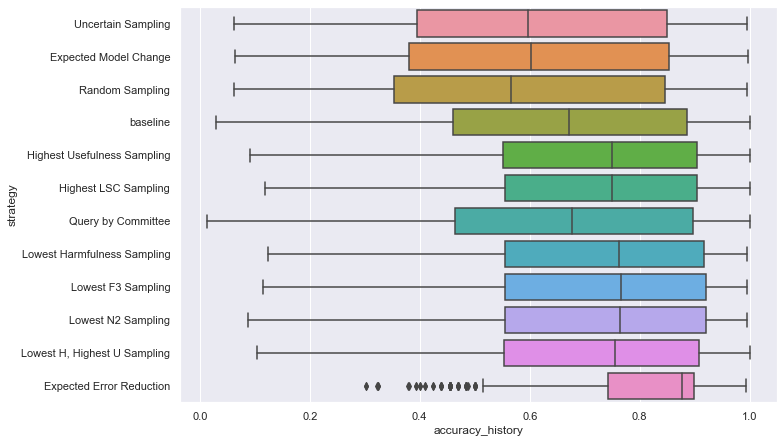

In [78]:
ax = sns.boxplot(data=df_all, x="accuracy_history", y="strategy", orient="h")

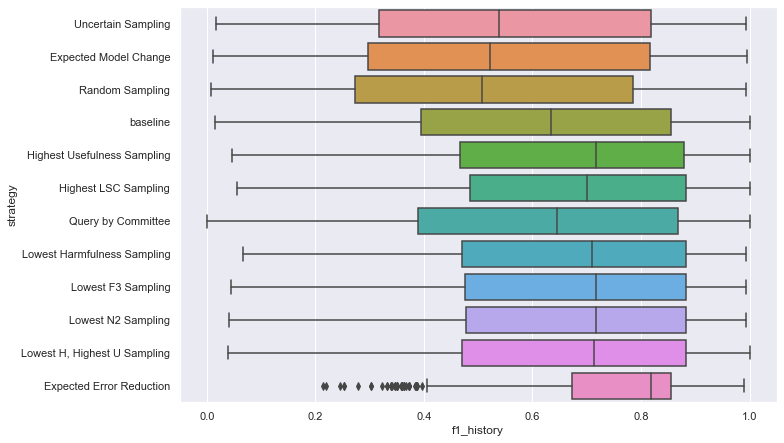

In [77]:
ax = sns.boxplot(data=df_all, x="f1_history", y="strategy", orient="h"
                )

## Testes (lineplot)

In [ ]:
# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)


k_legend = []
for idx,pht in enumerate(performance_history_total):
    ax.plot(pht)
    ax.scatter(range(len(pht)), pht, s=13)
    k_legend.append('k = ' + str(k_neighbor[idx]))

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title("Incremental classification accuracy with {n_queries} queries".format(n_queries = N_QUERIES))
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')
ax.legend(k_legend, loc='lower right')

plt.show()

[None]

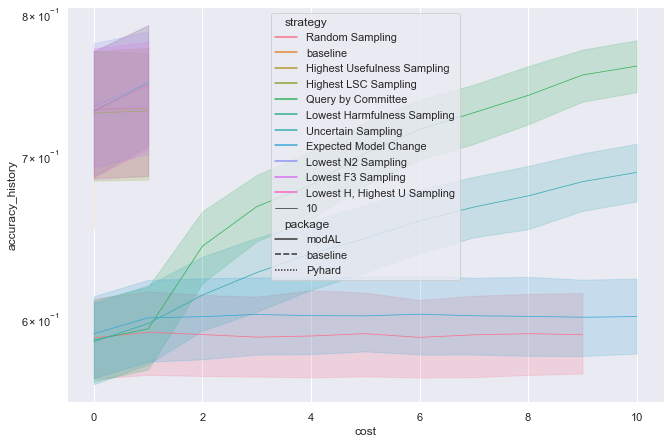

In [63]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction')], size=10).set(yscale="log")

[None]

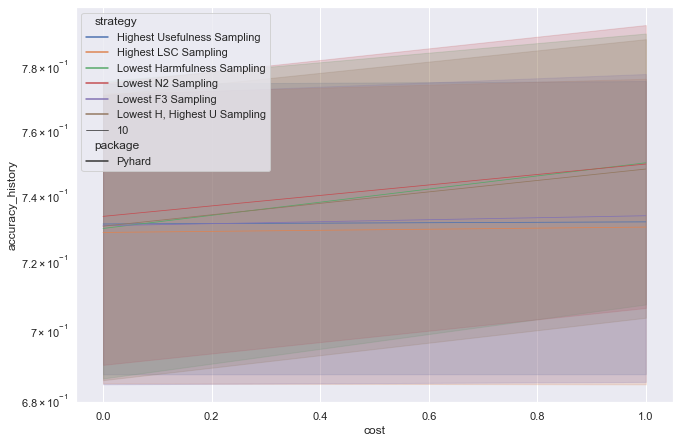

In [64]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.package == "Pyhard") & (df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction')], size=10).set(yscale="log")

In [72]:
df_filter = df_all[:]
df_filter = df_filter[(df_filter.package == 'baseline') | (df_filter.package == 'Pyhard') | ((df_filter.package == 'modAL') & (df_filter.cost == 0)) | ((df_filter.package == 'modAL') & (df_filter.cost == 10))]
df_filter[df_filter.cost == 10] = 1

[None]

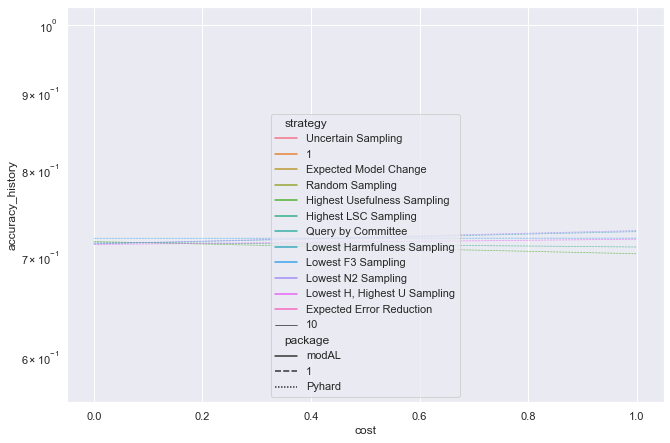

In [76]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package", ci=None,
             data=df_filter[(df_filter.package != "baseline") | (df_filter.classifier == "RF") & (df_filter.strategy != 'Expected Error Reduction')], size=10).set(yscale="log")

In [82]:
df_all

,package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag,cost
0,modAL,0.868795,5NN,0.075540,Uncertain Sampling,333_monks-problems-1,0.596154,0.586364,2,0
1,modAL,0.868795,5NN,0.075540,Uncertain Sampling,333_monks-problems-1,0.567308,0.540771,2,1
2,modAL,0.868795,5NN,0.075540,Uncertain Sampling,333_monks-problems-1,0.615385,0.600614,2,2
3,modAL,0.868795,5NN,0.075540,Uncertain Sampling,333_monks-problems-1,0.673077,0.667043,2,3
4,modAL,0.868795,5NN,0.075540,Uncertain Sampling,333_monks-problems-1,0.673077,0.667043,2,4
...,...,...,...,...,...,...,...,...,...,...
6,modAL,20.025830,RF,0.016782,Expected Model Change,21_car,0.694864,0.629637,0,6
7,modAL,20.025830,RF,0.016782,Expected Model Change,21_car,0.703927,0.604411,0,7
8,modAL,20.025830,RF,0.016782,Expected Model Change,21_car,0.694864,0.628297,0,8
9,modAL,20.025830,RF,0.016782,Expected Model Change,21_car,0.694864,0.629637,0,9


In [142]:
test['accuracy_history'].head(20)

dataset      package  strategy                  classifier  cost
37_diabetes  modAL    Expected Error Reduction  5NN         0       0.650685
                                                            1       0.621918
                                                            2       0.617808
                                                            3       0.645205
                                                            4       0.654795
                                                            5       0.641096
                                                            6       0.646575
                                                            7       0.635616
                                                            8       0.624658
                                                            9       0.661644
                                                            10      0.652055
                                                C4.5        0       0.646575
           

## Heatmap

<AxesSubplot:xlabel='classifier', ylabel='strategy'>

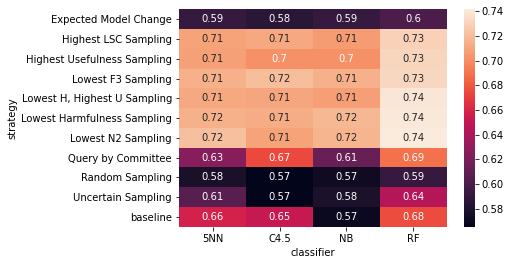

In [19]:
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction')], values='accuracy_history', index=['strategy'], columns='classifier')

sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

<AxesSubplot:xlabel='classifier', ylabel='strategy'>

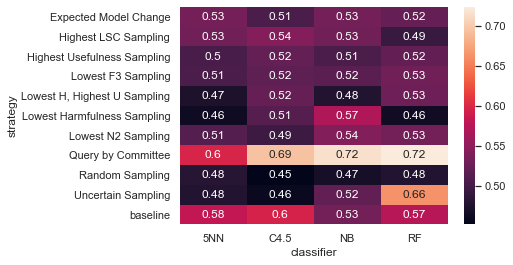

In [31]:
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction')], values='f1_history', index=['strategy'], columns='classifier')

sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

<AxesSubplot:xlabel='classifier', ylabel='strategy'>

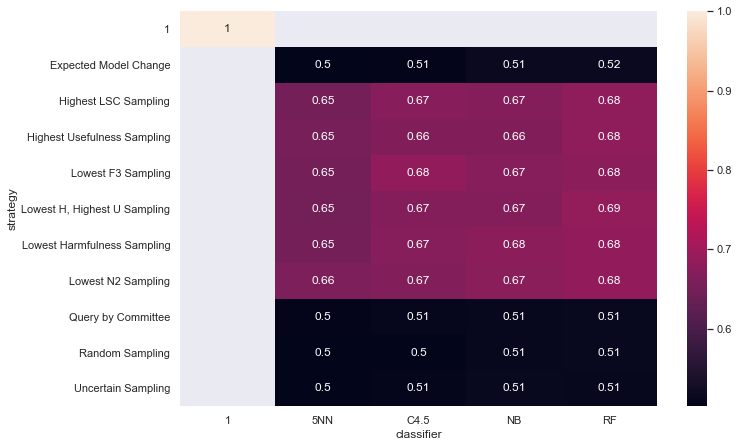

In [79]:
heatmap_data = pd.pivot_table(df_filter[(df_filter.strategy != 'Expected Error Reduction')], values='f1_history', index=['strategy'], columns='classifier')

sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

In [81]:
df_filter[df_filter.package == '1']

,package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag,cost
